In [1]:
import pandas as pd 
import numpy as np

In [2]:
#Get the data 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head(10)

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160
5,1425010073,27,False,27.713638
6,1425010373,37,False,41.545710
7,1425010673,36,False,38.743620
8,1425010973,49,False,40.859787
9,1425011273,36,False,25.444733


In [4]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])

In [5]:
train_df.head(5)

,timestamp,value,is_anomaly,predicted
0,1970-01-01 00:00:01.425008573,42,False,44.072500
1,1970-01-01 00:00:01.425008873,41,False,50.709390
2,1970-01-01 00:00:01.425009173,41,False,81.405120
3,1970-01-01 00:00:01.425009473,61,False,39.950367
4,1970-01-01 00:00:01.425009773,44,False,35.350160


In [6]:
train_df.describe()

,value,predicted
count,15830.000000,15830.000000
mean,85.572205,71.870715
std,321.760918,92.450520
min,0.000000,-281.389070
25%,29.000000,32.919171
50%,47.000000,49.771124
75%,76.000000,75.948052
max,13479.000000,2716.127200


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

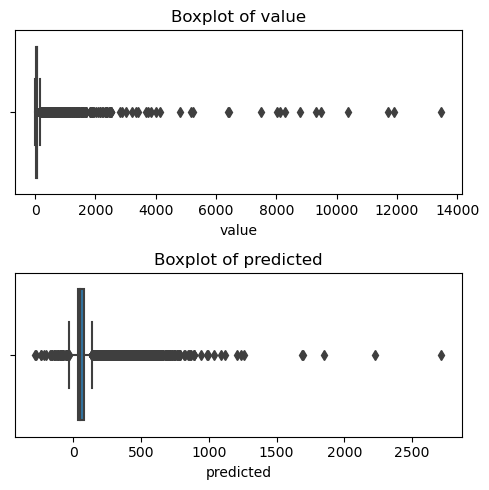

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))

#Plot boxplots for each numeric column
for i, col in enumerate(['value', 'predicted']):
    sns.boxplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()

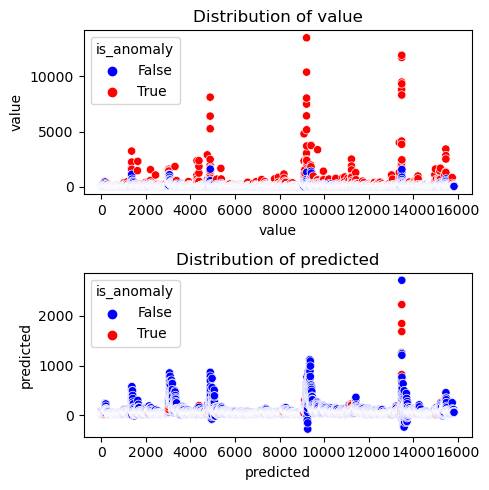

In [9]:
#Look at the scatter plots of the data points and the anomaly values 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))

#Plot scatter plot for each column
for i, col in enumerate(['value', 'predicted']):
    sns.scatterplot(x = np.arange(1, len(train_df) +1, 1) , y = train_df[col], 
                    hue = train_df['is_anomaly'], palette=['blue', 'red'], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()

<Axes: xlabel='value', ylabel='predicted'>

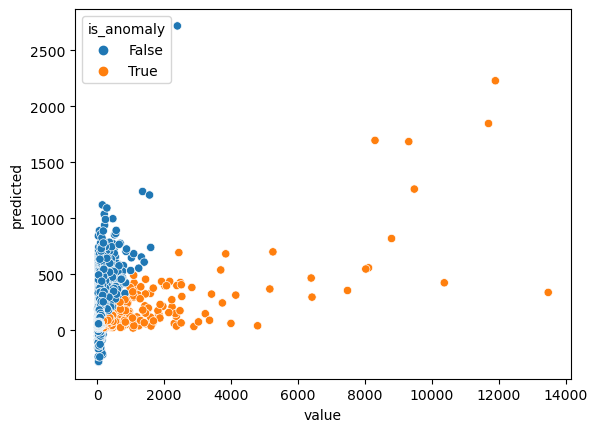

In [10]:
#Look at the correlation between the predicted values and the real values 
sns.scatterplot(x = train_df['value'], y = train_df['predicted'], hue = train_df['is_anomaly'])

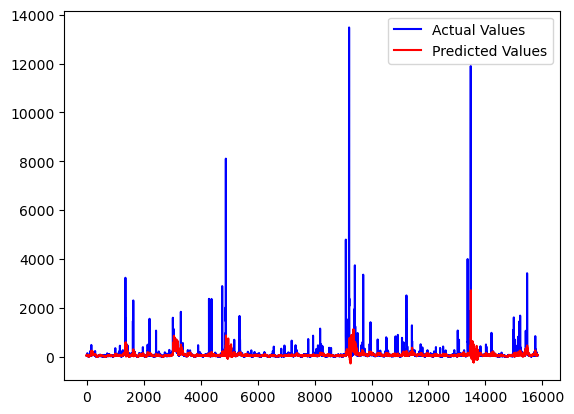

In [11]:
plt.plot(train_df.index,train_df['value'], c = 'b', label = 'Actual Values')
plt.plot(train_df.index, train_df['predicted'], c = 'r', label = 'Predicted Values')
plt.legend()
plt.show()

In [12]:
train_df.drop('timestamp', axis = 1, inplace = True)

In [13]:
train_df.head(5)

,value,is_anomaly,predicted
0,42,False,44.072500
1,41,False,50.709390
2,41,False,81.405120
3,61,False,39.950367
4,44,False,35.350160


In [14]:
#Generate more features for predictions 

#Get residuals
train_df['residual'] = train_df['predicted'] - train_df['value'] #difference between the predicted values and real values 

#Transform the real values to frequency space
from scipy.fft import fft
train_df['FFT_value'] = fft(train_df['value'])

#Transform the values into log scale
train_df['log_value'] = np.log(train_df['value'])


#Perform the same operation for the testing dataset
test_df['residual'] = test_df['predicted'] - test_df['value']
test_df['log_value'] = np.log(test_df['value'])



C:\Users\may7e\Anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
test_df.drop('timestamp', axis = 1, inplace= True)

In [16]:
test_df

,value,predicted,residual,log_value
0,20.00000,20.000000,0.000000,2.995732
1,20.00000,20.000000,0.000000,2.995732
2,20.00000,20.000000,0.000000,2.995732
3,20.00000,20.000000,0.000000,2.995732
4,20.00000,20.000000,0.000000,2.995732
...,...,...,...,...
3955,20.00384,19.836240,-0.167600,2.995924
3956,20.00384,19.207998,-0.795842,2.995924
3957,20.00384,20.103437,0.099597,2.995924
3958,20.00384,19.346764,-0.657076,2.995924


In [17]:
train_df_y = train_df['is_anomaly']
target = train_df_y.astype(int)

In [18]:
#drop log and FFT values. Contains Nans
test_df.drop('log_value', axis = 1, inplace = True)
train_df.drop(['log_value','FFT_value', 'is_anomaly'], axis = 1, inplace = True)

In [19]:
train_df

,value,predicted,residual
0,42,44.072500,2.072500
1,41,50.709390,9.709390
2,41,81.405120,40.405120
3,61,39.950367,-21.049633
4,44,35.350160,-8.649840
...,...,...,...
15825,44,53.624115,9.624115
15826,45,59.752296,14.752296
15827,48,52.147630,4.147630
15828,26,58.007545,32.007545


In [20]:
#Scale the data
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

train_scaled = Scaler.fit_transform(train_df)
test_scaled = Scaler.fit_transform(test_df)
test_scaled

array([[-0.81709482, -0.84210265, -0.1191605 ],
       [-0.81709482, -0.84210265, -0.1191605 ],
       [-0.81709482, -0.84210265, -0.1191605 ],
       ...,
       [-0.81695786, -0.83844914, -0.10643046],
       [-0.81695786, -0.86517568, -0.203145  ],
       [-0.81695786, -0.83733617, -0.10240299]])

In [21]:
#Split the data into training and validation split
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_scaled,target, test_size = 0.2, random_state = 42)

In [22]:
#Create an xgboost classifier model along with a SVM model 
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [23]:
#SVC Model
svc_model = SVC(kernel='rbf', gamma='scale')
svc_model.fit(train_x, train_y)

# Predict on the test set
prediction_svc = svc_model.predict(val_x)

# Evaluate the SVC model
print(classification_report(val_y, prediction_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2997
           1       0.93      0.40      0.56       169

    accuracy                           0.97      3166
   macro avg       0.95      0.70      0.77      3166
weighted avg       0.97      0.97      0.96      3166

